We have solved a simplified version of this problem already, using a different method, here: 
https://grainofsandendlessbeach.blogspot.com/2024/08/polygon-obstacle-path-finder-chapter-3.html

Previously (link above) we created a graph by finding all vertices visible from a particular vertex, for all vertices. Once the graph was fully formed, we ran a few graph search algorithms on it to find a path from the start to the end. Obviously A-star and uniform-cost search (dijkstra) found the shortest path (the red and green lines). Here we are taking a different approach: We are asked in Exercise 4.11 to turn this problem into an environment problem. No longer do we form a graph by fully surveying the problem then running an algorithm on the graph to obtain a solution. This time we are asked to provide an agent with percepts in the form of a collection of visible vertices. The agent then makes a decision on what action to take: this comes in the form of a vector describing a straight-line path to follow.

One of the difficulties in this version of the problem is that we have to take into account the size of the agent. For simplicity I am going to assume that the agent is circular. If this was not the case then it is a decent assumption to assume that the agent is bounded by a circular region. In the original problem (3.7, linked above) the agent was a point mass so we did not have to make a distinction between visbility and reachability. This time we are searching for collision between a disk and an obstacle, during the execution of an action. This is commonly referred to as swept collision detection.

If you want to run this code, look for `polygon_env.ipynb`, here: 
https://github.com/hmp-anthony/AIMA

## My Idea!



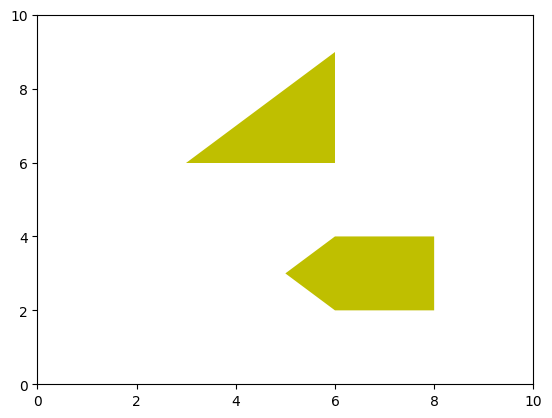

In [7]:
from search_2 import *
from matplotlib.patches import Polygon
from agents import *

class PolygonAgent(Agent):
    def __init__(self, program = None):
        super().__init__(program)
        # a pair of tuples, [(n1, n2), (x0, y0)]
        self.visibility_plane = None

class Environment:
    def __init__(self, polygons):
        self.agent = None
        self.agent_position = None
        self.polygons = polygons

    def percept(self):
        # We need to find all visible vertices.
        vertices = []
        for p in self.polygons:
            vertices.extend(p.get_vertices)
        # First, is the vertex in the agents visibiltiy region?
        for v in vertices:
            if self.agent.visibility_plane:
                None
            
        

class polygon:
    def __init__(self, vertices):
        self.vertices = vertices

    def get_vertices(self):
        return self.vertices

polygons = [polygon([(6,2), (8,2), (8,4), (6,4), (5,3)]),
            polygon([(3,6), (6,6), (6,9)])]

initial_position = (1,1)
goal = (8,8)


# graphics stuff
polygon_plot = []
for p in polygons:
    polygon_plot.append(Polygon(p.get_vertices(), facecolor = 'y'))

fig,ax = plt.subplots()
for p in polygon_plot:
    ax.add_patch(p)

ax.set_xlim([0,10])
ax.set_ylim([0,10])
plt.show()